In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

In [2]:
years = 20
rate = 0.07  # mean annual rate, e.g. VT ETF
dip_fee = 0.005  # DIP annual fee
contrib_emp = 48000  # employee contributions, max 48000
contrib_comp = 0  # employer contributions, max 50000
contrib = contrib_emp + contrib_comp
tax_rate = 0.15  # income tax rate
socsec_rate = 0.15  # social+healthcare tax rate (employee)
dip_tax_saving = contrib_emp * tax_rate + contrib_comp * (tax_rate + socsec_rate)
dps_state_contrib = 340 * 12
contrib_for_max_state_support = 1700
dps_tax_saving = (contrib_emp - 12 * contrib_for_max_state_support) * tax_rate + contrib_comp * (tax_rate + socsec_rate)
etf_ter = 0.001

In [3]:
res = defaultdict(list)
dip = 0
fees = 0
etf_dip_tax = 0
fees_etf_dip_tax = 0
etf_dps_tax = 0
fees_etf_dps_tax = 0
etf = 0  # benchmark
etf_fees = 0
dps = 0  # doplnkove penzijni sporeni, benchmark
dps_fees = 0

for year in range(1, years + 1):
    dip = (dip + contrib) * (1 + rate)
    fee = dip * (dip_fee + etf_ter)
    dip -= fee
    fees += fee
    res["dip"].append(dip)
    res["fees"].append(fees)

    etf_dip_tax = (etf_dip_tax + dip_tax_saving) * (1 + rate)
    fee = etf_dip_tax * etf_ter
    etf_dip_tax -= fee
    fees_etf_dip_tax += fee
    res["etf_dip_tax"].append(etf_dip_tax)
    res["fees_etf_dip_tax"].append(fees_etf_dip_tax)
    
    etf = (etf + contrib) * (1 + rate)
    fee = etf * etf_ter
    etf_fees += fee
    etf -= fee
    res["etf"].append(etf)
    res["etf_fees"].append(fee)
    
    dps = (dps + contrib + dps_state_contrib) * (1 + rate)
    fee = dps * (0.015 + etf_ter)  # on average DSP costs 1.5% annually
    dps -= fee
    dps_fees += fee
    res["dps"].append(dps)
    res["dps_fees"].append(dps_fees)

    etf_dps_tax = (etf_dps_tax + dps_tax_saving) * (1 + rate)
    fee = etf_dps_tax * etf_ter
    etf_dps_tax -= fee
    fees_etf_dps_tax += fee
    res["etf_dps_tax"].append(etf_dps_tax)
    res["fees_etf_dps_tax"].append(fees_etf_dps_tax)

res = pd.DataFrame(res)
res["dps_reinvest"] = res.dps + res.etf_dps_tax
res["dps_reinvest_fees"] = res.dps_fees + res.fees_etf_dps_tax
res["dip_reinvest"] = res.dip + res.etf_dip_tax
res["dip_reinvest_fees"] = res.fees + res.fees_etf_dip_tax
res

,dip,fees,etf_dip_tax,fees_etf_dip_tax,etf,etf_fees,dps,dps_fees,etf_dps_tax,fees_etf_dps_tax,dps_reinvest,dps_reinvest_fees,dip_reinvest,dip_reinvest_fees
0,5.105184e+04,308.160000,7696.296000,7.704000,5.130864e+04,51.360000,5.483399e+04,891.609600,4425.370200,4.429800,5.925936e+04,896.039400,5.874814e+04,315.864000
1,1.053496e+05,944.072813,15923.097683,23.643037,1.061540e+05,106.260245,1.125676e+05,2721.977116,9155.781168,13.594746,1.217234e+05,2735.571862,1.212727e+05,967.715850
2,1.630995e+05,1928.576962,24716.972807,48.384751,1.647798e+05,164.944763,1.733542e+05,5540.744066,14212.259364,27.821232,1.875664e+05,5568.565297,1.878165e+05,1976.961713
3,2.245212e+05,3283.835885,34117.009742,82.535912,2.274467e+05,227.674406,2.373551e+05,9400.177012,19617.280602,47.458149,2.569724e+05,9447.635161,2.586382e+05,3366.371798
4,2.898481e+05,5033.422171,44164.991224,126.745113,2.944333e+05,294.728003,3.047405e+05,14355.306372,25394.869954,72.878440,3.301353e+05,14428.184812,3.340131e+05,5160.167284
5,3.593285e+05,7202.407153,54905.580069,181.705653,3.660372e+05,366.403604,3.756891e+05,20464.072573,31570.708540,104.480751,4.072598e+05,20568.553324,4.142341e+05,7384.112806
6,4.332265e+05,9817.456200,66386.517703,248.158624,4.425768e+05,443.019804,4.503896e+05,27787.479931,38172.247679,142.691209,4.885618e+05,27930.171139,4.996130e+05,10065.614823
7,5.118228e+05,12906.930065,78658.836368,326.896198,5.243922e+05,524.917160,5.290401e+05,36389.758669,45228.830912,187.965314,5.742690e+05,36577.723983,5.904817e+05,13233.826262
8,5.954164e+05,16500.992678,91777.085959,418.765153,6.118472e+05,612.459699,6.118498e+05,46338.535508,52771.824426,240.789963,6.646216e+05,46579.325471,6.871935e+05,16919.757831
9,6.843248e+05,20631.725793,105799.576494,524.670635,7.053305e+05,706.036547,6.990384e+05,57705.013266,60834.756484,301.685615,7.598731e+05,58006.698880,7.901244e+05,21156.396427


<Axes: >

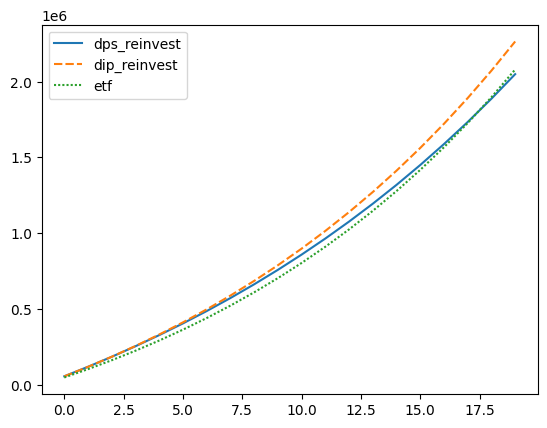

In [4]:
sns.lineplot(res[["dps_reinvest", "dip_reinvest", "etf"]])

<Axes: >

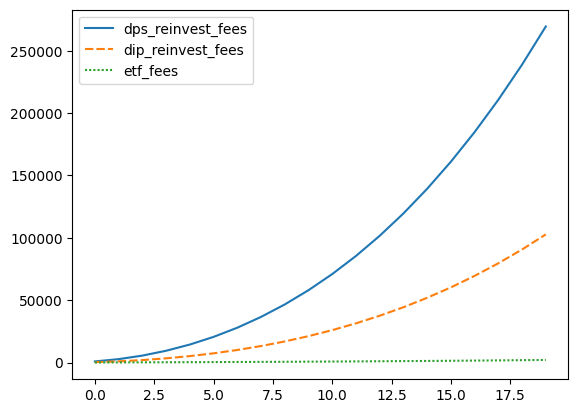

In [5]:
sns.lineplot(res[["dps_reinvest_fees", "dip_reinvest_fees", "etf_fees"]])